This is a sample dataset which tracks a fictional telco company's customer churn based on a variety of possible factors. I got it from this URL https://community.ibm.com/accelerators/catalog/content/Customer-churn. 
The Churn column indicates whether or not the customer left within the last month. Other columns include tensure, personal information, the charging information, and the services each customer has. 

I will do the following tasks on this customer churn dataset:
1. Retrieve data
2. Examine the dataset, such as the numbers of rows and columns, column list, data types, and missing value
3. Clean and prepare the dataset for next step on exploratory data analysis
4. Perform EDA
5. Perform Feature Engineering
6. Make 3 hypotheses according to the finding and insights gained from the steps above and testing one of the hypotheses
7. Conclusion on the dataset

# Retrieve data

In [125]:
import os
import numpy as np
import pandas as pd
filepath = "data/CustomerChurn.csv"
df_raw = pd.read_csv(filepath)
df_raw.head()

,LoyaltyID,CustomerID,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,318537,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,152148,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,326527,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,845894,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,503388,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Examine the dataset

In [126]:
# number of rows and number of columns
df_raw.shape

(7043, 21)

In [127]:
# check data type of each column
df_raw.dtypes

LoyaltyID             int64
CustomerID           object
SeniorCitizen        object
Partner              object
Dependents           object
Tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [128]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LoyaltyID         7043 non-null   int64  
 1   CustomerID        7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [129]:
df_raw.describe(include='all')

,LoyaltyID,CustomerID,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043,7043,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,NaN,7043,2,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,NaN,7590-VHVEG,No,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,NaN,1,5901,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,550382.651001,NaN,NaN,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,260776.118690,NaN,NaN,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,100346.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,323604.500000,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,548704.000000,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,776869.000000,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN



The dataset include only 3 numerical variables as follows:

1) Tenure(Number of months the customer has stayed with the company)

2) MonthlyCharges(The amount charged to the customer monthly)

3) Total Charges(The total amount charged to the customer)

All other variables are Categorical.

Our target variable is Churn(Whether the customer churned or not (Yes or No)). We will predict the Churn rate.

# Clean Data
The goal here is to spot any missing values, and understand the variables. We should also fix wrong datatypes, remove NaN values, check for duplicates. We should also add new columns where we are going to convert categorical variables to numeric ones.

In [130]:
df=df_raw.copy()

In [131]:
# Check duplicated data
df.duplicated().sum()

0

In [132]:
# Replace blank with NaN
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [133]:
# Check missing value
df.isnull().sum()

LoyaltyID            0
CustomerID           0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [134]:
df[df['TotalCharges'].isnull()]

,LoyaltyID,CustomerID,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,344543,4472-LVYGI,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,150036,3115-CZMZD,No,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,497688,5709-LVOEQ,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,158969,4367-NUYAO,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,470044,1371-DWPAZ,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,937662,7644-OMVMY,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,821083,3213-VVOLG,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,947028,2520-SGTTA,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,135257,2923-ARZLG,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,317862,4075-WKNIU,No,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


The null value in TotalCharges is due to the Tenure is 0. There are only 11 missing values vs. 7043 total numbers of records. It does not worth filling the values with the mean, meadian, or any other methods. Therefore, I am going to simply drop those missing values in column TotalCharges.

In [135]:
# Drop NaN values
df=df.dropna() 

In [136]:
df.isnull().sum()

LoyaltyID           0
CustomerID          0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [137]:
df.shape

(7032, 21)

In [138]:
# Converet data type from object to float for the column TotalCharges
df['TotalCharges']=df['TotalCharges'].astype(float)
df.dtypes

LoyaltyID             int64
CustomerID           object
SeniorCitizen        object
Partner              object
Dependents           object
Tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [139]:
# Drop columns LoyaltyID and CustomerID
df.drop(['LoyaltyID', 'CustomerID'], axis = 1, inplace = True)
df.head()

,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [140]:
stats_df = df.describe()
# Select just the rows desired from the 'describe' method and add in the 'median'
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df

,Tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
median,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000
range,71.000000,100.500000,8666.000000


In [141]:
import matplotlib.pyplot as plt
%matplotlib inline

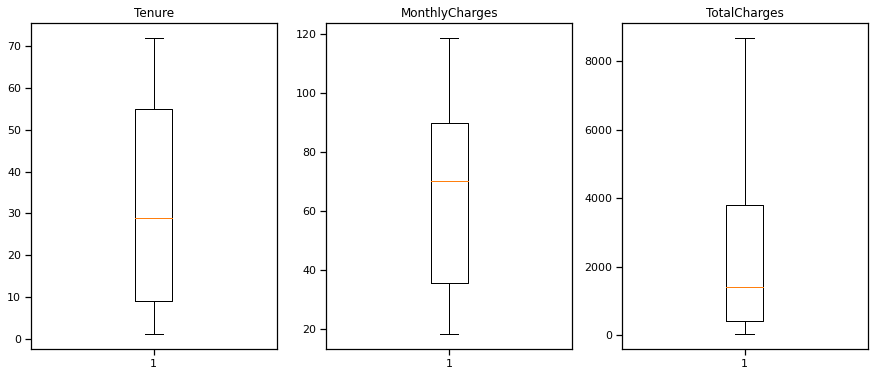

In [142]:
#check outliers of numberic variables using boxplot
col = df.columns
col_num = [col for col in col if df[col].dtype != object]
ig, ax = plt.subplots(1,3, figsize=(15, 6))

for i, col in enumerate(col_num):
    ax[i].boxplot(df[col]) 
    ax[i].set_title(col)

Tenure is positively skewed as mean is greater than median
MonthlyCharges is negatively skewed as mean is lower than median
TotalCharges is positively skewed as mean is greater than median 
But it doesn't seem to me that there is any outlier. 

array([[<AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'MonthlyCharges'}>],
       [<AxesSubplot:title={'center':'TotalCharges'}>, <AxesSubplot:>]],
      dtype=object)

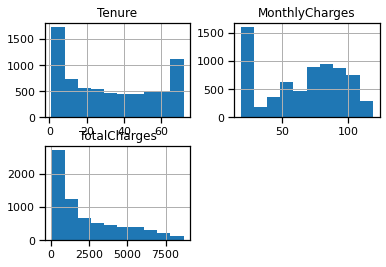

In [143]:
df.hist()

In [144]:
import seaborn as sns
sns.set_context('notebook')

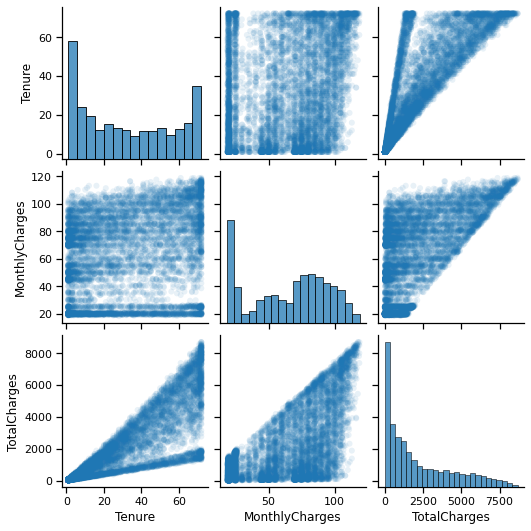

In [145]:
sns.pairplot(df[col_num], plot_kws=dict(alpha=.1, edgecolor='none'))

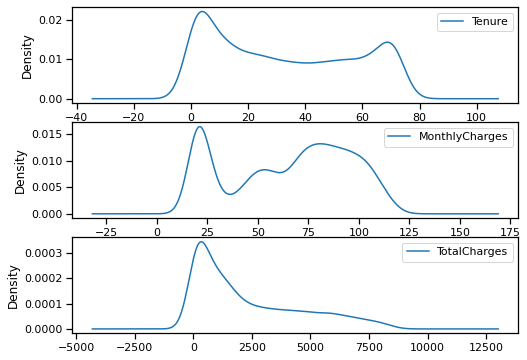

In [146]:
fig, axes = plt.subplots(3,1 ,figsize=(8,6))

for i,c in enumerate(col_num):
    f = df[[c]].plot(kind = 'kde', ax=axes[i])

In [147]:
# Preprocess categorical features
df.describe(include='object')

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


Values like "No internet service", "No phone service" should be equal to "NO".

In [148]:
df.replace("No phone service","No",inplace=True)
df.replace("No internet service","No",inplace=True)

In [149]:
# Convert categorical variables to be numeric with LabelEncoder
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
col = df.columns
col_cat = [col for col in col if df[col].dtype == object]
for label in col_cat:
    new_column_name = f"{label}_Labeled"
    df[new_column_name] = lb.fit_transform(df[label])

df.head()

,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,OnlineSecurity_Labeled,OnlineBackup_Labeled,DeviceProtection_Labeled,TechSupport_Labeled,StreamingTV_Labeled,StreamingMovies_Labeled,Contract_Labeled,PaperlessBilling_Labeled,PaymentMethod_Labeled,Churn_Labeled
0,No,Yes,No,1,No,No,DSL,No,Yes,No,...,0,1,0,0,0,0,0,1,2,0
1,No,No,No,34,Yes,No,DSL,Yes,No,Yes,...,1,0,1,0,0,0,1,0,3,0
2,No,No,No,2,Yes,No,DSL,Yes,Yes,No,...,1,1,0,0,0,0,0,1,3,1
3,No,No,No,45,No,No,DSL,Yes,No,Yes,...,1,0,1,1,0,0,1,0,0,0
4,No,No,No,2,Yes,No,Fiber optic,No,No,No,...,0,0,0,0,0,0,0,1,2,1


# EDA
We'll try to analyze the data and spot if there's a pattern on why do customers leave the company. 

In [150]:
df.describe(include='all')

,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,OnlineSecurity_Labeled,OnlineBackup_Labeled,DeviceProtection_Labeled,TechSupport_Labeled,StreamingTV_Labeled,StreamingMovies_Labeled,Contract_Labeled,PaperlessBilling_Labeled,PaymentMethod_Labeled,Churn_Labeled
count,7032,7032,7032,7032.000000,7032,7032,7032,7032,7032,7032,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
unique,2,2,2,NaN,2,2,3,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,No,No,No,NaN,Yes,No,Fiber optic,No,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,5890,3639,4933,NaN,6352,4065,3096,5017,4607,4614,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,32.421786,NaN,NaN,NaN,NaN,NaN,NaN,...,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.688567,0.592719,1.573237,0.265785
std,NaN,NaN,NaN,24.545260,NaN,NaN,NaN,NaN,NaN,NaN,...,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.832934,0.491363,1.067504,0.441782
min,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000
75%,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000


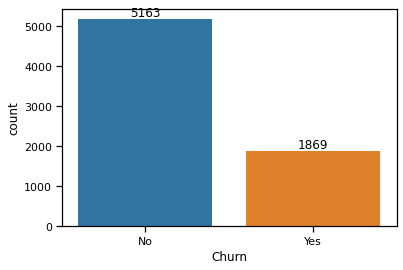

In [151]:
fig_churn = sns.countplot(x="Churn",data=df)
fig_churn.bar_label(fig_churn.containers[0])
plt.show()

Tne count of Churn customers looks is much less than non Churn customers. In total, there are 1869 Chrun customers.

#### Group the features into 4
demographic ['SeniorCitizen',"Partner",'Dependents']

services ['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','TechSupport','StreamingTV','StreamingMovies','DeviceProtection']

account ['Contract','PaperlessBilling','PaymentMethod']

numeric ['Tenure', 'MonthlyCharges', 'TotalCharges']

### <span style="color:blue">How numeric features affect Churn?</span>
['Tenure', 'MonthlyCharges', 'TotalCharges']

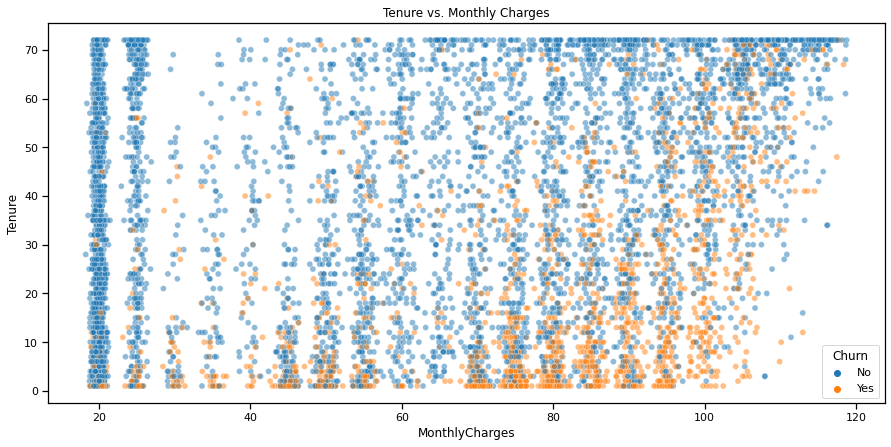

In [152]:
f, ax = plt.subplots(figsize=(15, 7))
fig_churn_tenure_monthlycharges = sns.scatterplot(x="MonthlyCharges",y="Tenure",hue="Churn",alpha=0.5,data=df)
fig_churn_tenure_monthlycharges.set_title("Tenure vs. Monthly Charges")
plt.show()

Most of the Churn customers are on the right side and rather closer to the bottom (shorter Tenure). This indicates that the rather newer customers but with higher monthly charges might more eager to churn. 
I should probably use MonthlyCharges and Tenure as features for my Churn rate prediction model, because it seems they affect the target Churn feature.

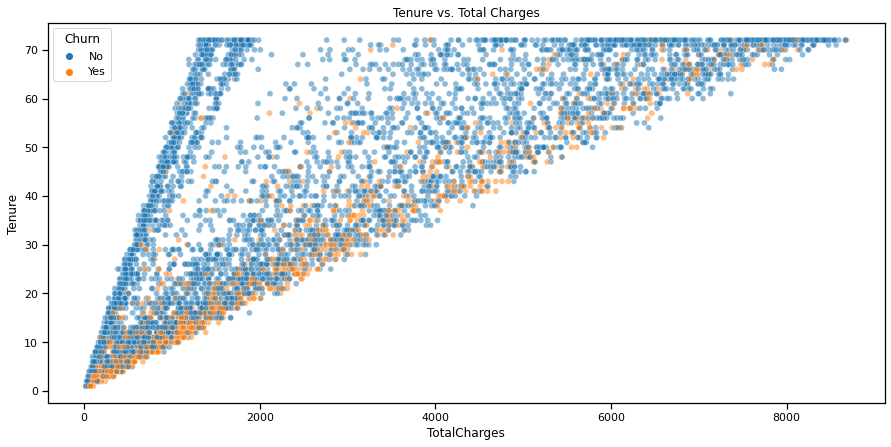

In [153]:
f, ax = plt.subplots(figsize=(15, 7))
fig_churn_tenure_monthlycharges = sns.scatterplot(x="TotalCharges",y="Tenure",hue="Churn",alpha=0.5,data=df)
fig_churn_tenure_monthlycharges.set_title("Tenure vs. Total Charges")
plt.show()

It looks to me that the blue points (No Churn) are most densely on the left side (lower Total Charges) and we see when the No Churn customers stay longer, they don't have large increase in Total Charges. Most of the Churn customers are on the bottom. That means Churn Customers just joined recenlty. 
This indicates Totcal Charges and Tensure are features affect the target feature Churn and they should be used in my Churn prediction model..

### <span style="color:blue">How demographic features affect Churn?</span>
['SeniorCitizen',"Partner",'Dependents']

In [154]:
df_demographic=df[['SeniorCitizen',"Partner",'Dependents', 'Churn']]
df_demographic.head()

,SeniorCitizen,Partner,Dependents,Churn
0,No,Yes,No,No
1,No,No,No,No
2,No,No,No,Yes
3,No,No,No,No
4,No,No,No,Yes


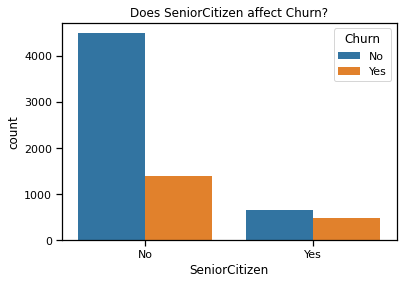

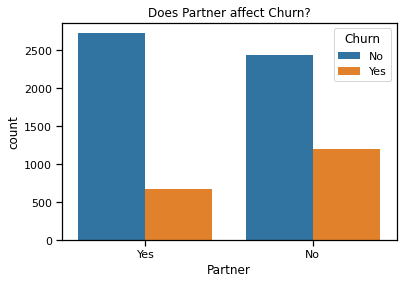

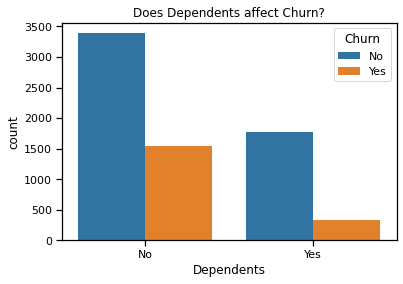

In [155]:
cols_demographic = ['SeniorCitizen',"Partner",'Dependents']
for col in cols_demographic:
    fig = sns.countplot(x=col,hue="Churn",data=df_demographic)
    title="Does "+f"{col}"+" affect Churn?"
    fig.set_title(title)
    plt.show()

Summary for demographic features:
1. The first chart shows how the seniority affects customer Churn or No Churn. 
  - The majority of the customers are non senior and No Churn.
  - The senior customers are more likely to Churn, but the Churn for senior customers is just a bit higher than No Churn.
  - The following calulation shows consistent results:
      - The percent of Churns vs. NoChurn in the group of non senior customers is 23.65 vs 73.35. 
      - But in the group of senior customers, the Churn vs. NoChurn is 41.68 vs. 58.32 which is not that signifcant.

In [156]:
total_customers = 7032
x=df.copy()
x['cust_count']=1
x_senior=x.groupby('SeniorCitizen')['cust_count', 'Churn_Labeled'].sum().reset_index()
x_senior["percent_Churns"] = (x_senior["Churn_Labeled"] / x_senior["cust_count"]) * 100
x_senior["percent_NoChurns"] = 100 - x_senior["percent_Churns"]
x_senior.head()

/var/folders/xd/czmhpsjd6b3cg9dln3vyh14m0000gn/T/ipykernel_65145/1048055903.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  x_senior=x.groupby('SeniorCitizen')['cust_count', 'Churn_Labeled'].sum().reset_index()


,SeniorCitizen,cust_count,Churn_Labeled,percent_Churns,percent_NoChurns
0,No,5890,1393,23.650255,76.349745
1,Yes,1142,476,41.681261,58.318739


Continue the summary for the other 2 demographic features:

2. The second chart shows when customers are not married (have No Parner) could be more likely to Churn.

3. The third chart show when customers who are living without dependents could be more likely to Churn.

4. There may be likely the Correlation between Partner and Dependents these 2 features.

### <span style="color:blue">How service features affect Churn?</span>
services ['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','TechSupport','StreamingTV','StreamingMovies','DeviceProtection']

In [157]:
import plotly.express as px

In [178]:
# I would investigate the relationship between these services features and Churn customers
df_churn=df[df.Churn_Labeled==1]
cols_services=['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','TechSupport','StreamingTV','StreamingMovies','DeviceProtection']

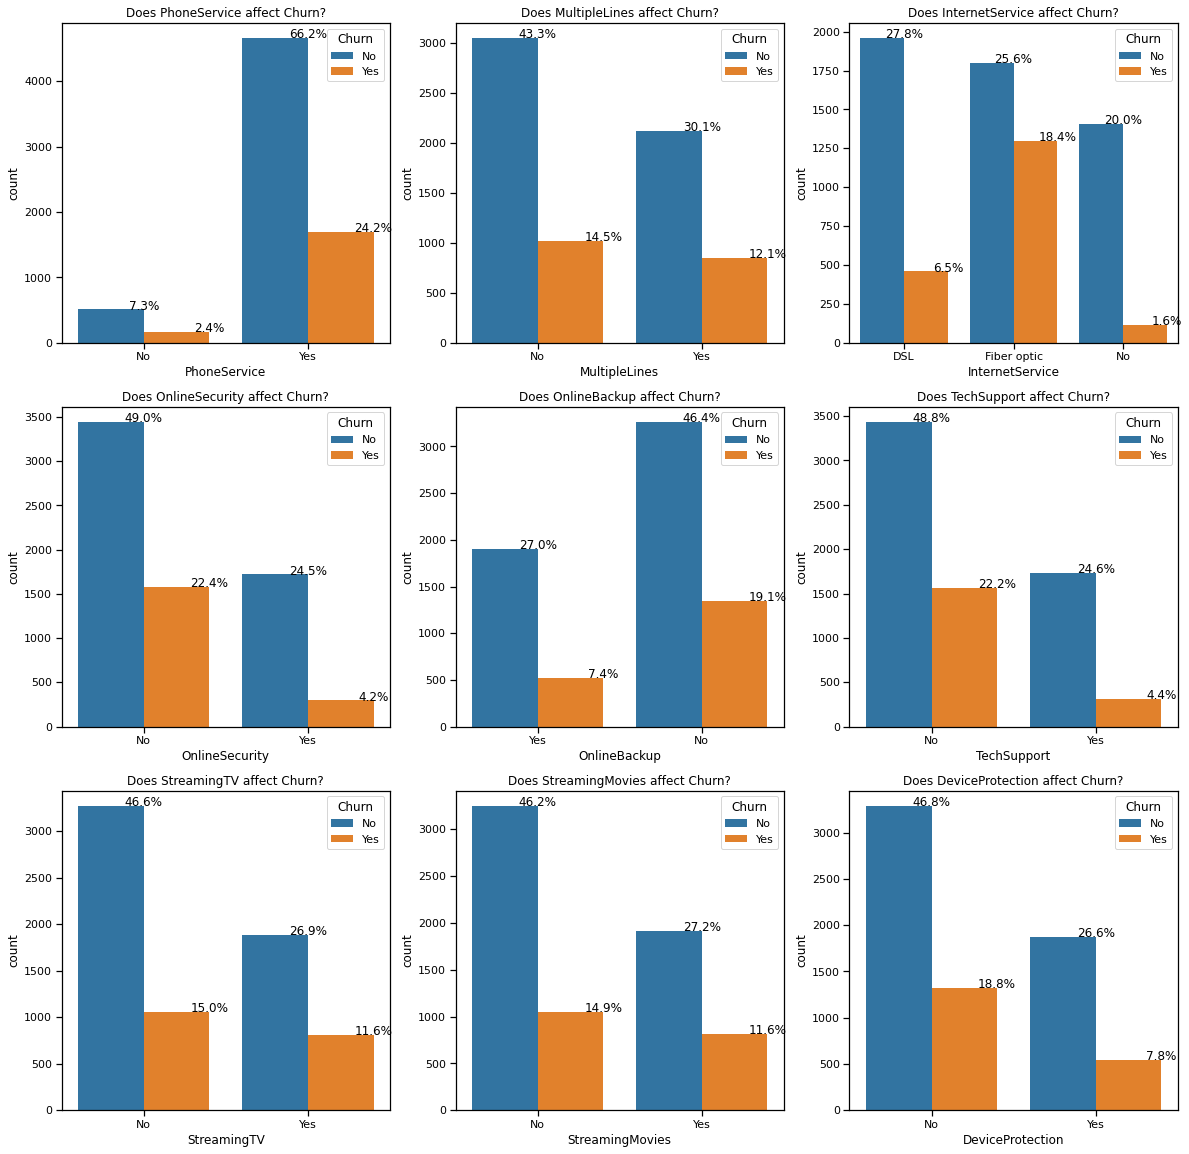

In [252]:
plt.figure(figsize=(20,20))
total=float(len(df))
for i in enumerate(cols_services):
    plt.subplot(3,3,i[0]+1)
    ax=sns.countplot(x=i[1],hue='Churn',data=df)
    title="Does "+f"{i[1]}"+" affect Churn?"
    ax.set_title(title)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')
        #plt.xticks(rotation=45)

Summary for services features:

-For PhoneService, 

most of people have phone service (90%) so few of them are churn(27%)
and for they haven't phone service churn rate is (25%), it is close too.

-For MultipleLines col:

churn is little higher for Clients who have MultipleLines (29%) compared to 
other ones that have no multipleLine(25%) and No phone services (25%).

-For MultipleLines col:

most of clints use Fiber optic in their internet Service (44%) and the
churn rate for them is (42%).

-For Online Security, OnlineBackup, TechSupport and DeviceProtection cols:

churn is high for Clients that do not have Online Security
(42%),OnlineBackup (40%), TechSupport (42%) and DeviceProtection (39%). 

-For StreamingTV and StreamingMovies cols:

Also it's a little higher for the clients who do not have
StreamingTV or StreamingMovies.

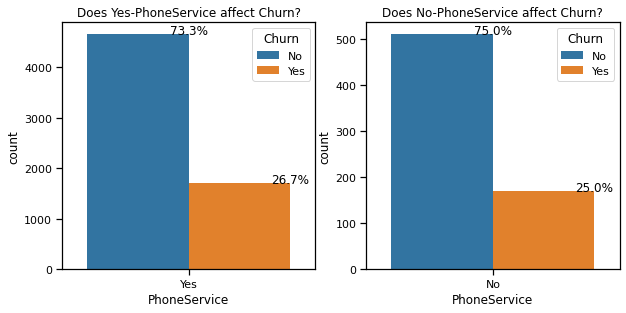

In [315]:
plt.figure(figsize=(10,10))
df_churn=df[df.Churn_Labeled==1]
cols_services=['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','TechSupport','StreamingTV','StreamingMovies','DeviceProtection']
df_no_churn=df[df.Churn_Labeled==0]

# df_phone=df[df.PhoneService=='Yes']
# df_no_phone=df[df.PhoneService=='No']

total_phone=float(len(df_phone))
total_no_phone=float(len(df_no_phone))

plt.subplot(2,2,1)
ax_phone=sns.countplot(x='PhoneService', hue='Churn', data=df[df.PhoneService=='Yes'])
title_phone="Does Yes-PhoneService affect Churn?"
ax_phone.set_title(title_phone)
for p in ax_phone.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/float(len(df[df.PhoneService=='Yes'])))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax_phone.annotate(percentage, (x, y),ha='center')
    #plt.xticks(rotation=45)
plt.subplot(2,2,2)
ax_no_phone=sns.countplot(x='PhoneService', hue='Churn', data=df[df.PhoneService=='No'])
title_no_phone="Does No-PhoneService affect Churn?"
ax_no_phone.set_title(title_no_phone)
for p in ax_no_phone.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/float(len(df[df.PhoneService=='No'])))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax_no_phone.annotate(percentage, (x, y),ha='center')
    #plt.xticks(rotation=45)

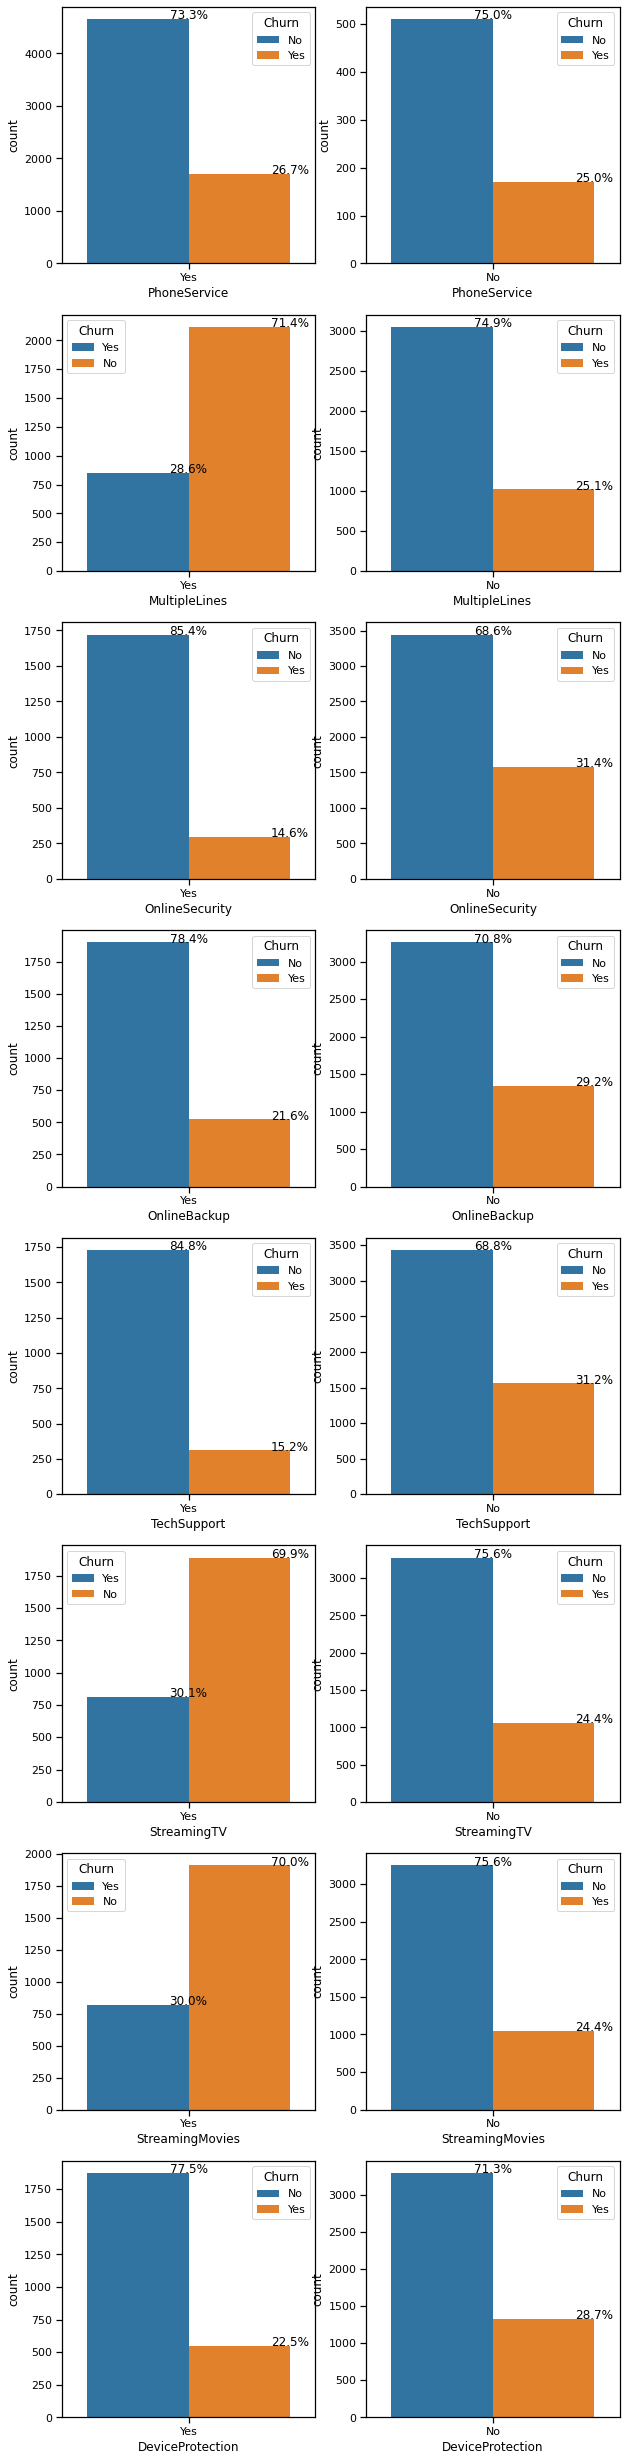

In [364]:
plt.figure(figsize=(10,50))
# cols_services=['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','TechSupport','StreamingTV','StreamingMovies','DeviceProtection']
cols_services=['PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','TechSupport','StreamingTV','StreamingMovies','DeviceProtection']

def draw_service(col,data,total):
    ax=sns.countplot(x=col, hue='Churn', data=data)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')
        #plt.xticks(rotation=45)
c=0
for i in enumerate(cols_services):
    col=i[1]
    data_yes=df[df[col]=='Yes']
    data_no=df[df[col]=='No']
    total_yes=float(len(data_yes))
    total_no=float(len(data_no))
    c=c+1
    plt.subplot(9,2,c)
    c=c+1
    draw_service(col,data_yes,total_yes)
    plt.subplot(9,2,c)
    draw_service(col,data_no,total_no)


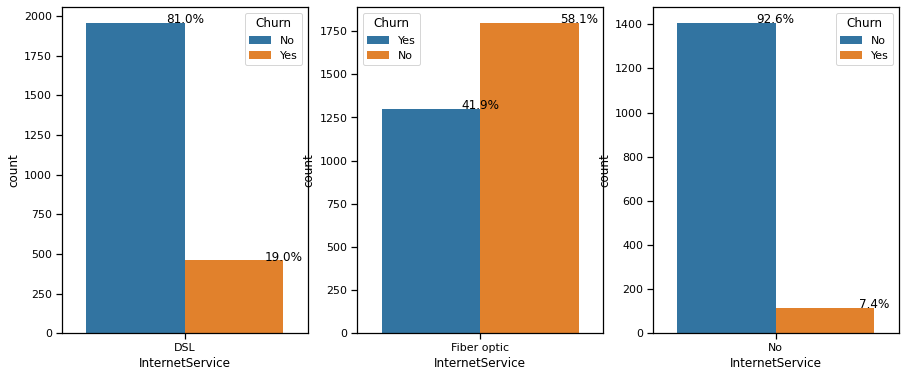

In [371]:
plt.figure(figsize=(15,6))
# cols_services=['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','TechSupport','StreamingTV','StreamingMovies','DeviceProtection']
# cols_services=['PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','TechSupport','StreamingTV','StreamingMovies','DeviceProtection']

def draw_service(col,data,total):
    ax=sns.countplot(x=col, hue='Churn', data=data)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')
        #plt.xticks(rotation=45)
plt.subplot(1,3,1)
data_dsl=df[df['InternetService']=='DSL']
data_no=df[df['InternetService']=='No']
data_fiber=df[df['InternetService']=='Fiber optic']
total_dsl=float(len(data_dsl))
total_fiber=float(len(data_fiber))
total_no=float(len(data_no))

draw_service('InternetService',data_dsl,total_dsl)
plt.subplot(1,3,2)
draw_service('InternetService',data_fiber,total_fiber)
plt.subplot(1,3,3)
draw_service('InternetService',data_no,total_no)



Continue the summary for rest of services features:
2. The customers with Fiber Optic of internet service have higher Churn than the other two groups of customers (with DSL or No internet service).
3. Customers without services MultipleLine, 

In [ ]:
# import plotly.express as px